In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


배경:

저출산 : 한국은 전 세계 최저 수준의 출산율과 급격한 지방 인구 감소로 인해 사회경제적 문제가 매우 심각함
수도권과밀화(지방 공동화) : 수도권 집중화로 인한 주택/교통 문제, 지방 경제 약화 등이 발생하고 있음.
페르소나 :

이름 : 이경영
소속 : 국토교통부 도시발전계획과 데이터분석팀
목표 :

2030년까지 출산율 1.3 회복
2030년까지 지역 균형발전
이를 위한 데이터 기반 정책 수립


2. 분석 목표 및 방법
분석 목표:

저출산 문제: 출생률 감소 원인 파악 (결혼율, 이혼율, 지역별 차이 등).

수도권 과밀화: 지역별 인구 증감 추세, 수도권 집중 요인 분석.

분석 방법:

시계열 분석: 출생률, 사망률, 자연증가율 추이.

지역별 비교: 수도권 vs. 비수도권의 결혼율, 이혼율, 인구 이동 데이터 연관성 분석.

상관관계 분석: 경제·사회 지표(예: 주택 가격, 일자리)와 출산율 간 관계 탐색.



3. 데이터셋 피쳐 설명


Date: 날짜 (월/일/년)

Region: 지역

Birth: 출생자 수

Birth_rate: 출생률

Death: 사망자 수

Death_rate: 사망률

Divorce: 이혼 건수

Divorce_rate: 이혼률

Marriage: 결혼 건수

Marriage_rate: 결혼률

Natural_growth: 자연증가 인구 (출생 - 사망)

Natural_growth_rate: 자연증가율



In [ ]:
4. 가설 설정
저출산 문제:

가설 1: 결혼율 감소가 출생률 하락의 주요 원인일것이다.

가설 2 : 지역별 경제 수준과 출산율의 상관관계가 높을것이다.(추가데이터수집필요)(지역별 경제소득 데이터)

가설 3: 수도권의 높은 생활비가 출산 기피로 이어진다.(추가데이터수집필요)(수도권 물가지수 데이터)

가설 4 : 20~30대의 높은 실업률이 결혼율 감소에 주요 원인일것이다.(추가데이터수집필요/2030실업률 데이터)


지방 공동화:

가설 1: 지방의 낮은 혼인율이 인구 감소를 가속화한다.

가설 2 : 지방의 자연증가율이  수도권보다 낮다.

가설 3: 지방의 청년 인구 유출이 자연증가율 마이너스로 연결된다.(추가데이터수집필요/전국 인구수 및 인구이동 데이터)

가설 4: 수도권으로의 인구 유입이 지방 인구 감소를 가속화한다.(추가데이터수집필요/전국 인구수 및 인구이동 데이터)




In [7]:
# 원본 데이터 로드
df = pd.read_csv('data/Korean_demographics.csv')


In [42]:
df

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,6/1/2022,Jeollanam-do,565.0,3.80,1369.0,9.1,299.0,2.0,479.0,3.2,-805.0,-5.4
4856,6/1/2022,Sejong,248.0,7.90,106.0,3.4,43.0,1.4,123.0,3.9,141.0,4.5
4857,6/1/2022,Seoul,3137.0,4.10,3631.0,4.7,1088.0,1.4,2630.0,3.4,-494.0,-0.6
4858,6/1/2022,Ulsan,443.0,4.80,434.0,4.7,154.0,1.7,316.0,3.5,9.0,0.1


In [8]:
# 추출할 지역 목록
target_regions = [
    'Jeollanam-do', 'Jeollabuk-do', 
    'Gyeongsangnam-do', 'Gyeongsangbuk-do',
    'Chungcheongnam-do', 'Chungcheongbuk-do',
    'Gangwon-do', 'Jeju'
]

In [9]:
# 지정 지역만 필터링
filtered_df = df[df['Region'].isin(target_regions)].copy()


In [10]:
filtered_df

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
5,1/1/2000,Gangwon-do,1966.0,14.91,1067.0,8.1,304.0,2.3,817.0,6.2,899.0,6.8
8,1/1/2000,Gyeongsangbuk-do,3362.0,14.14,2230.0,9.4,406.0,1.7,1691.0,7.1,1132.0,4.8
9,1/1/2000,Gyeongsangnam-do,3928.0,15.05,2125.0,8.1,577.0,2.2,2092.0,8.0,1803.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...
4850,6/1/2022,Gyeongsangbuk-do,836.0,3.90,1878.0,8.8,416.0,1.9,641.0,3.0,-1042.0,-4.9
4851,6/1/2022,Gyeongsangnam-do,1051.0,3.90,1860.0,6.9,554.0,2.1,784.0,2.9,-809.0,-3.0
4853,6/1/2022,Jeju,248.0,4.50,340.0,6.1,114.0,2.1,232.0,4.2,-92.0,-1.7
4854,6/1/2022,Jeollabuk-do,591.0,4.10,1223.0,8.4,257.0,1.8,411.0,2.8,-632.0,-4.3


In [12]:
# 날짜 형식을 변환하고 연도 필터링
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_filtered = df[(df['Year'] >= 2015) & (df['Year'] <= 2022)]

# 사용할 8개 지역 선정 (예시: 주요 광역시와 도 중심)
selected_regions = [
    'Seoul', 'Busan', 'Daegu', 'Incheon', 
    'Gwangju', 'Daejeon', 'Ulsan', 'Gyeonggi-do'
]

# 지역 필터링
df_selected = df_filtered[df_filtered['Region'].isin(selected_regions)]

# 지역별 연도별 자연증가율 계산
growth_by_region_year = df_selected.pivot_table(
    index='Year',
    columns='Region',
    values='Natural_growth_rate'
)

growth_by_region_year

Region,Busan,Daegu,Daejeon,Gwangju,Gyeonggi-do,Incheon,Seoul,Ulsan
Year,,,,,,,,
2015,1.675000,2.566667,4.491667,3.400000,4.908333,4.166667,4.025000,5.858333
2016,1.116667,1.933333,3.641667,2.966667,4.041667,3.275000,3.266667,5.125000
2017,0.033333,0.941667,2.541667,1.766667,2.941667,2.116667,2.316667,3.875000
2018,-1.000000,0.125000,1.300000,0.916667,2.191667,1.641667,1.341667,2.441667
2019,-1.541667,-0.216667,0.625000,0.516667,1.741667,1.158333,1.025000,1.983333
2020,-2.350000,-1.358333,-0.050000,-0.325000,1.141667,0.116667,0.200000,1.158333
2021,-2.708333,-1.633333,-0.350000,-0.025000,0.658333,-0.516667,-0.341667,0.566667
2022,-4.350000,-3.383333,-1.350000,-1.516667,-0.283333,-1.750000,-1.516667,-0.933333


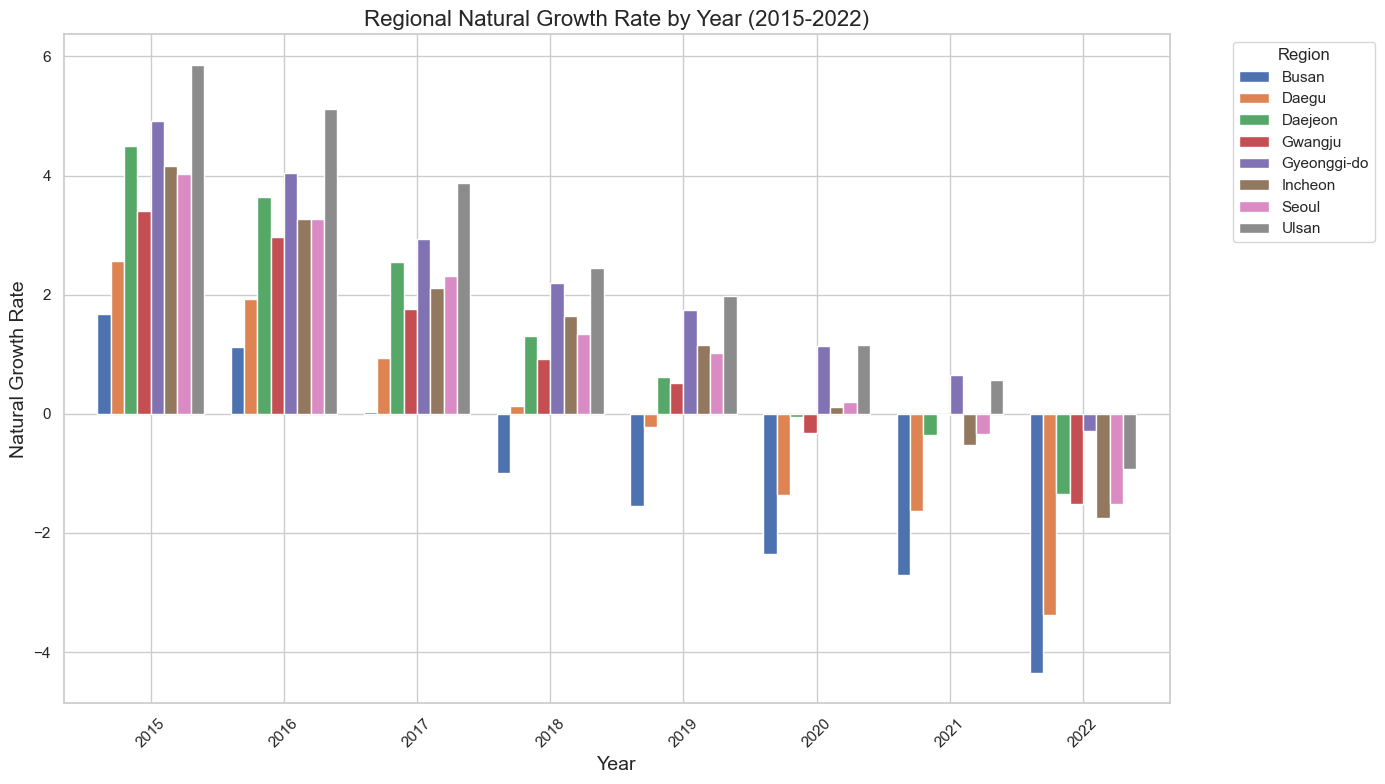

In [17]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
plt.title('Regional Natural Growth Rate by Year (2015-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Natural Growth Rate', fontsize=14)

# 바플롯 그리기
growth_by_region_year.plot(kind='bar', width=0.8, ax=plt.gca())

# 그래프 꾸미기
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()




plt.show()

In [13]:
# 사용자 요청에 따라 사용할 지역 목록 재설정
selected_regions_user = [
    'Jeollanam-do', 'Jeollabuk-do', 'Gyeongsangnam-do', 'Gyeongsangbuk-do',
    'Chungcheongnam-do', 'Chungcheongbuk-do', 'Gangwon-do', 'Jeju-do'
]

# 지역 필터링 및 연도 유지
df_selected_user = df_filtered[df_filtered['Region'].isin(selected_regions_user)]

# 지역별 연도별 자연증가율 계산
growth_by_region_year_user = df_selected_user.pivot_table(
    index='Year',
    columns='Region',
    values='Natural_growth_rate'
)

growth_by_region_year_user

Region,Chungcheongbuk-do,Chungcheongnam-do,Gangwon-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeollabuk-do,Jeollanam-do
Year,,,,,,,
2015,1.858333,2.033333,-0.250000,0.550000,2.475000,0.191667,-0.775000
2016,1.250000,1.316667,-0.908333,-0.133333,1.766667,-0.741667,-1.366667
2017,0.183333,0.183333,-1.683333,-1.250000,0.666667,-1.591667,-2.358333
2018,-0.475000,-0.675000,-2.350000,-2.333333,-0.441667,-2.483333,-3.191667
2019,-1.275000,-1.116667,-2.383333,-2.716667,-0.825000,-3.041667,-3.200000
2020,-1.883333,-1.933333,-2.841667,-3.775000,-1.800000,-3.633333,-4.191667
2021,-2.358333,-2.525000,-3.533333,-4.150000,-2.358333,-4.233333,-4.983333
2022,-4.266667,-4.666667,-5.350000,-6.633333,-4.416667,-6.450000,-7.416667


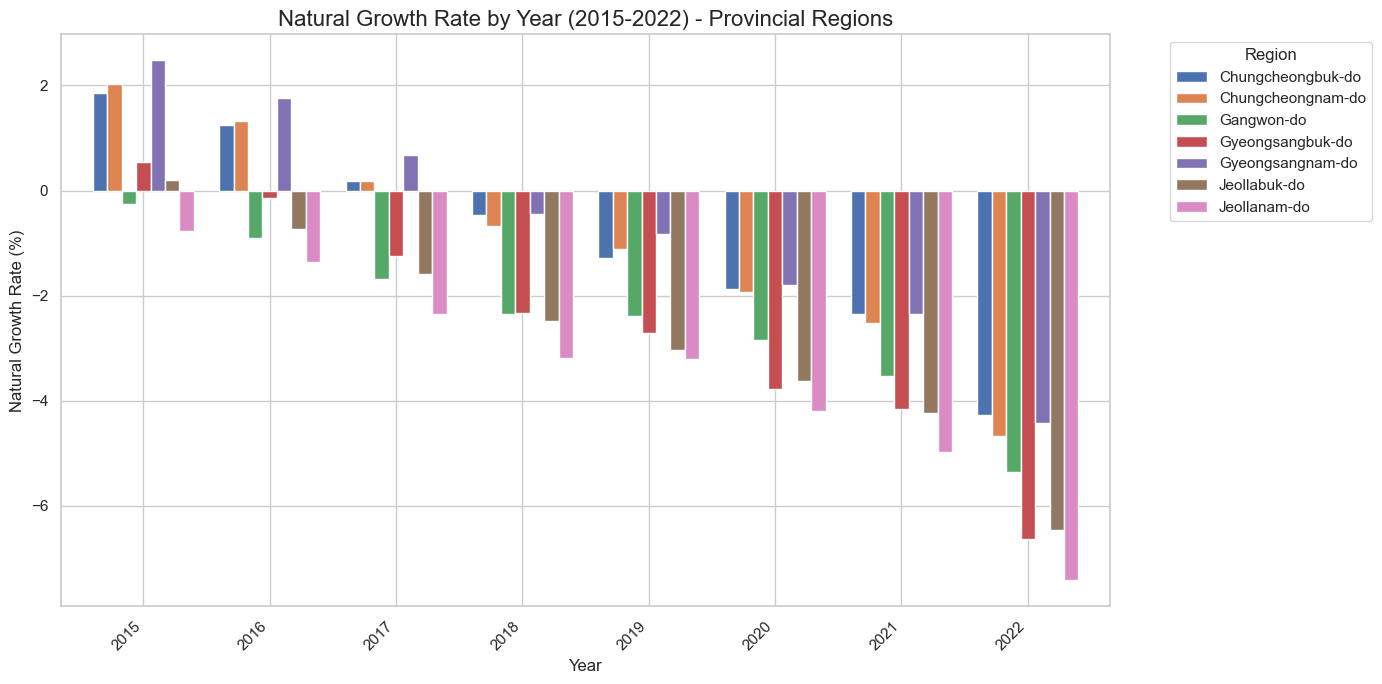

In [19]:
# 그래프 설정
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
plt.title('Natural Growth Rate by Year (2015-2022) - Provincial Regions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Natural Growth Rate (%)', fontsize=12)

# 데이터 플롯
growth_by_region_year_user.plot(kind='bar', width=0.8, ax=plt.gca())

# 레이아웃 조정
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
여기까지보면 도시권도만만치않지만 지방쪽은 심각하게 자연증가율이 좋지가않다

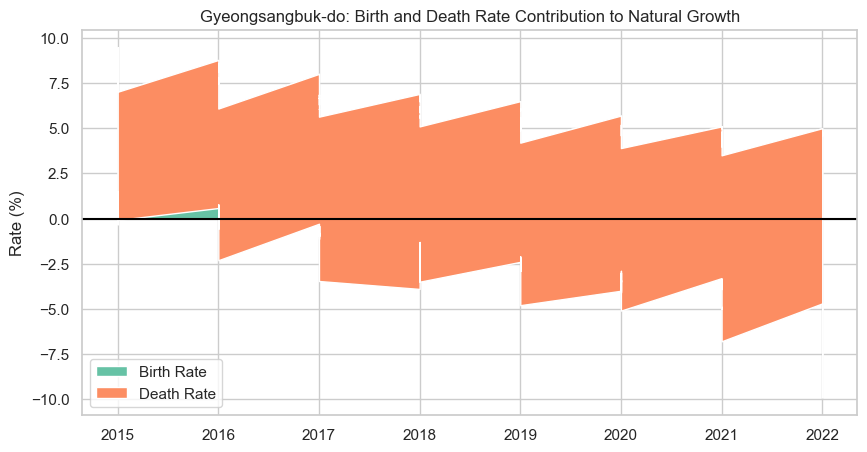

In [72]:
# 지방(예시: 경상북도) 데이터 필터링
df_region = df_filtered[df_filtered['Region'] == 'Gyeongsangbuk-do']

plt.figure(figsize=(10, 5))
plt.stackplot(df_region['Year'], 
              df_region['Birth_rate'], 
              -df_region['Death_rate'],  # 사망률은 음수로 표현
              labels=['Birth Rate', 'Death Rate'],
              colors=['#66c2a5', '#fc8d62'])
plt.axhline(0, color='black', linestyle='-')
plt.title('Gyeongsangbuk-do: Birth and Death Rate Contribution to Natural Growth')
plt.ylabel('Rate (%)')
plt.legend(loc='lower left')
plt.show()

 "자연증가율 악화의 주범은 출생률 감소인가, 사망률 증가인가?


In [ ]:
출생률(초록색)이 급격히 감소하면서 자연증가율을 마이너스로 끌어내림

사망률(주황색)은 완만히 상승해 추가적 악영향

출생률 감소가 사망률 증가보다 더 큰 영향

In [ ]:


솔루션 :출생률 회복: 지방형 육아지원금(예: 제2자녀 출산시 1억 지원)